In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [122]:
data = pd.read_csv(r'C:\Users\Admin\Downloads\7.1 7.2 Data Cleaning and Feature selection Review\learningSet.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_13540\3263632739.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'C:\Users\Admin\Downloads\7.1 7.2 Data Cleaning and Feature selection Review\learningSet.csv')


In [4]:
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,OSOURCE,0.000000
2,TCODE,0.000000
3,STATE,0.000000
4,ZIP,0.000000
...,...,...
476,MDMAUD_R,0.000000
477,MDMAUD_F,0.000000
478,MDMAUD_A,0.000000
479,CLUSTER2,0.001383


In [5]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.25]
columns_above_threshold['column_name']

23      NUMCHLD
26      WEALTH1
28      MBCRAFT
29     MBGARDEN
30      MBBOOKS
         ...   
451    RAMNT_20
452    RAMNT_21
453    RAMNT_22
454    RAMNT_23
455    RAMNT_24
Name: column_name, Length: 72, dtype: object

In [6]:
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list)

['NUMCHLD', 'WEALTH1', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'WEALTH2', 'ADATE_5', 'ADATE_10', 'ADATE_13', 'ADATE_15', 'ADATE_17', 'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24']


In [7]:
for item in ['WEALTH1','WEALTH2']:
    drop_columns_list.remove(item)
data=data.drop(columns=drop_columns_list)

In [8]:
data.shape

(95412, 411)

In [9]:
data['MAILCODE'].value_counts()
data['MAILCODE'] = data['MAILCODE'].apply(lambda x: x.replace(" ", "A"))
data = data.apply(lambda x: x.replace(" ", np.NaN))

In [127]:
nulls_percent_df1 = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df1.columns = ['column_name', 'nulls_percentage']
#nulls_percent_df1

In [128]:
#columns_above_threshold1 = nulls_percent_df1[nulls_percent_df1['nulls_percentage']>0.25]
#columns_above_threshold1['column_name']

In [12]:
drop_columns_list1= list(columns_above_threshold1['column_name'])+['OSOURCE','ZIP']
print(drop_columns_list1)

['PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'AGEFLAG', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'WEALTH1', 'SOLP3', 'SOLIH', 'MAJOR', 'WEALTH2', 'GEOCODE', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'PEPSTRFL', 'RFA_5', 'RFA_10', 'RFA_13', 'RFA_15', 'RFA_17', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24', 'OSOURCE', 'ZIP']


In [13]:
for item in ['VETERANS','SOLIH','WEALTH1','WEALTH2']:
    drop_columns_list1.remove(item)
data=data.drop(drop_columns_list1,axis=1)

In [14]:
data.shape

(95412, 366)

In [124]:
#categorical = data.select_dtypes(np.object)
#categorical.isna().sum()/len(categorical)

In [125]:
df = pd.DataFrame(categorical['STATE'].value_counts()).reset_index()

df.columns = ['state', 'count']
other_states = list(df[df['count']<2500]['state'])

def clean_state(x):
    if x in other_states:
        return 'other'
    else:
        return x
    
categorical['STATE'] = list(map(clean_state, categorical['STATE']))

In [23]:
categorical['GENDER'] = categorical['GENDER'].fillna('F')

In [24]:
categorical['GENDER'].value_counts(dropna=False)

F    54234
M    39094
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [25]:
categorical['GENDER']=np.where(categorical['GENDER'].isin(['F','M']),categorical['GENDER'],'other')

In [26]:
categorical['GENDER'].value_counts()

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64

In [27]:
Y = data[['TARGET_B', 'TARGET_D']]
Y.head()

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [91]:
numerical = data.select_dtypes(np.number)
numerical = numerical.drop(columns = ['TARGET_B', 'TARGET_D'])
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,0,39,34,...,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0,15,55,...,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0,20,29,...,5.0,9512,9001,9101.0,12.0,7.481481,15078,1,4,60.0
3,8701,0,2801,70.0,1.0,4.0,2,0,23,14,...,10.0,9512,8702,8711.0,9.0,6.812500,172556,1,4,41.0
4,8601,0,2001,78.0,3.0,2.0,60,1,28,9,...,15.0,9601,7903,8005.0,14.0,6.864865,7112,1,2,26.0


In [35]:
categorical['GEOCODE2'].value_counts(dropna=False)

A      34484
B      28505
D      16580
C      15524
NaN      319
Name: GEOCODE2, dtype: int64

In [36]:
categorical['GEOCODE2']=categorical['GEOCODE2'].fillna('A')

In [52]:
numerical['WEALTH1'].value_counts(dropna=False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

In [55]:
np.floor(numerical['WEALTH1'].mean())

5.0

In [129]:
categorical=pd.read_csv(r'C:\Users\Admin\Downloads\7.1 7.2 Data Cleaning and Feature selection Review\categorical7_02.csv')

In [48]:
categorical=categorical.drop('Unnamed: 0',axis=1)

In [130]:
numerical=pd.read_csv(r'C:\Users\Admin\Downloads\7.1 7.2 Data Cleaning and Feature selection Review\numerical7_02.csv')

In [108]:
numerical=numerical.drop('Unnamed: 0',axis=1)

In [109]:
numerical['WEALTH1'].value_counts(dropna=False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

In [110]:
numerical['WEALTH1']=numerical['WEALTH1'].fillna(np.floor(numerical['WEALTH1'].mean()))

In [111]:
numerical['WEALTH1'].value_counts(dropna=False)

5.0    50012
9.0     7585
8.0     6793
7.0     6198
6.0     5825
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

In [123]:
#sorted(numerical['ADI'].value_counts())

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ADI', ylabel='Density'>

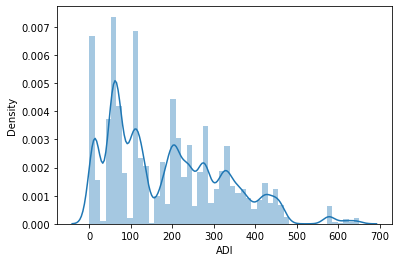

In [113]:
sns.distplot(numerical['ADI'])

In [131]:
numerical['ADI']=numerical['ADI'].fillna(numerical['ADI'].median())

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DMA', ylabel='Density'>

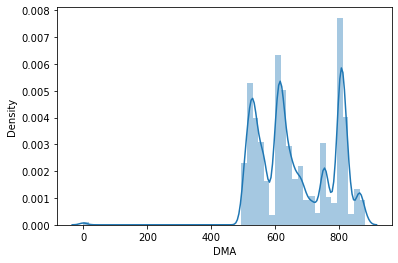

In [132]:
sns.distplot(numerical['DMA'])

In [133]:
numerical['ADI'].median()

175.0

In [119]:
numerical['DMA']=numerical['DMA'].fillna(numerical['DMA'].median())

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MSA', ylabel='Density'>

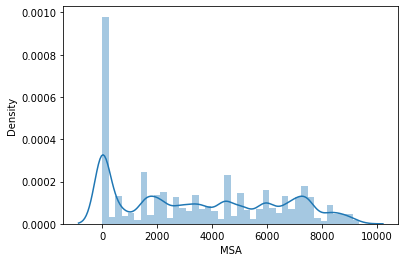

In [80]:
sns.distplot(numerical['MSA'])

In [89]:
numerical['MSA']=numerical['MSA'].fillna(0)

In [90]:
numerical['MSA'].isna().sum()

0